In [ ]:
import pandas as pd

df_principal = pd.read_excel("14_MATRICULAS_ED_SUPERIOR_LOS_LAGOS_2021.xlsx ")

df_principal.head()

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,45,Femenino,22,20 a 24,2018,Primer semestre,Universidades Privadas,UNIVERSIDAD SANTO TOMAS,ACREDITADA,31/03/2021 AL 31/03/2025,...,Carreras Profesionales,Ciencias Sociales,10,0,10,134000,3154000,Los Lagos,Osorno,Osorno
1,49,Femenino,54,40 y mas,2019,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE LOS LAGOS,ACREDITADA,12/12/2016 AL 12/12/2020,...,Carreras Tecnicas,Educacion,5,0,5,102000,1721000,Los Lagos,Chiloe,Castro
2,51,Femenino,25,25 a 29,2020,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Administracion y Comercio,4,0,4,220000,1864000,Los Lagos,Llanquihue,Puerto Montt
3,75,Masculino,23,20 a 24,2019,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE LOS LAGOS,ACREDITADA,12/12/2016 AL 12/12/2020,...,Carreras Tecnicas,Educacion,5,0,5,102000,1721000,Los Lagos,Llanquihue,Puerto Montt
4,121,Femenino,19,15 a 19,2020,Primer semestre,Universidades Privadas,UNIVERSIDAD SAN SEBASTIAN,ACREDITADA,13/09/2016 AL 13/09/2021,...,Carreras Profesionales,Administracion y Comercio,10,1,10,185300,4182600,Los Lagos,Llanquihue,Puerto Montt


### DATOS A USAR

1. RANGO EDAD:  CUALITATIVO ORDINAL
2. VALOR ARANCEL (PESOS): CUALITATIVO CONTINUO
3. DURACION TOTAL CARRERA (SEMESTRES): CUANTITATIVO DISCRETO
4. GENERO: CUALITATIVA NOMINAL

# Apartado de graficos

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

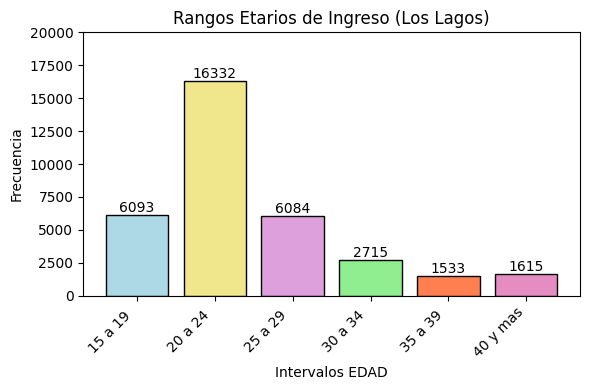

In [23]:
# Dato 1 a usar: RANGO EDAD


frecuencia = df_principal['RANGO EDAD'].value_counts().sort_index()
n = frecuencia.sum()


tabla = pd.DataFrame({
    'fi': frecuencia,
    'hi': round((frecuencia/n) *100, 1) # redondear según contexto y valores de los datos.
})
tabla

valores=tabla['fi'].values  
etiquetas = tabla.index
fig,ax=plt.subplots(figsize=(6,4))

tabla

columnas=ax.bar(etiquetas,valores,color=['lightblue','khaki','plum','lightgreen','coral',"#E58CC2"],edgecolor='black')
ax.bar_label(columnas)

#Personalización
ax.set_title('Rangos Etarios de Ingreso (Los Lagos)')
ax.set_xlabel('Intervalos EDAD')
ax.set_ylabel('Frecuencia')
ax.set_ylim(0,20000)

plt.xticks(rotation=45,ha='right')

plt.tight_layout()
plt.show()


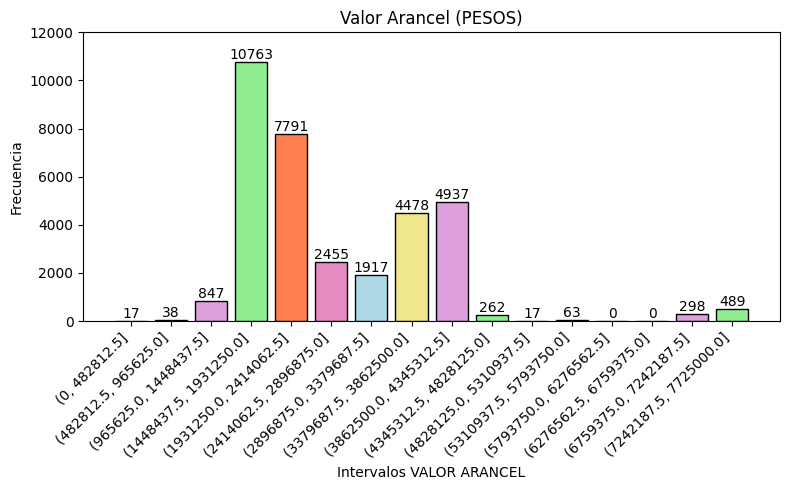

In [51]:
# Dato 1 a usar: Valor Arancel


import numpy as np


inter = int(round(1 + 3.3 * np.log10(df_principal.shape[0])))

intervalos = pd.cut(df_principal['VALOR ARANCEL (PESOS)'], bins=inter, include_lowest=True, precision=2)

frecuencia=intervalos.value_counts().sort_index()
frecuencia


tabla = pd.DataFrame({
    'fi': frecuencia,
    'hi': round((frecuencia/n) *100, 1) # redondear según contexto y valores de los datos.
})
tabla

valores=tabla['fi'].values  
etiquetas = list(frecuencia.index.astype(str))
etiquetas[0]= '(0, 482812.5]'

fig,ax=plt.subplots(figsize=(8,5))

columnas=ax.bar(etiquetas,valores,color=['lightblue','khaki','plum','lightgreen','coral',"#E58CC2"],edgecolor='black')
ax.bar_label(columnas)

#Personalización
ax.set_title('Valor Arancel (PESOS)')
ax.set_xlabel('Intervalos VALOR ARANCEL')
ax.set_ylabel('Frecuencia')
ax.set_ylim(0,12000)

plt.xticks(rotation=45,ha='right')

plt.tight_layout()
plt.show()




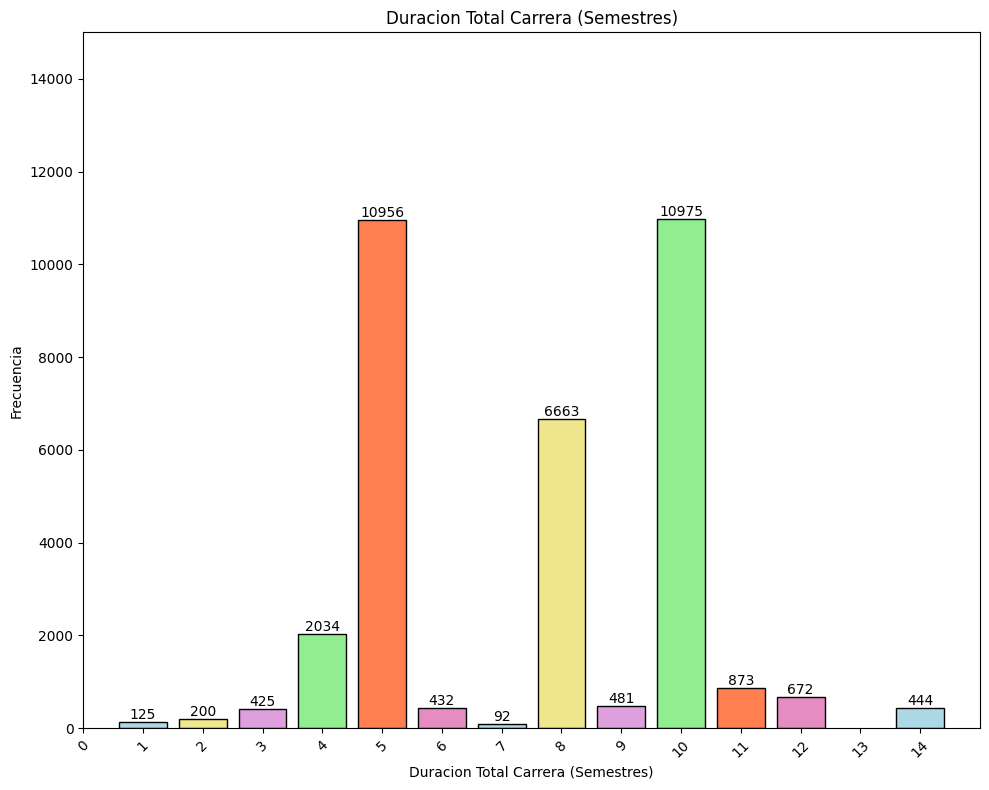

In [80]:
# Dato 1 a usar: Duracion Total Carrera


frecuencia= df_principal['DURACION TOTAL CARRERA (SEMESTRES)'].value_counts().sort_index()

tabla = pd.DataFrame({
    'fi': frecuencia,
    'hi': (frecuencia/n) *100, # redondear según contexto y valores de los datos.
    'Fi':frecuencia.cumsum(),
    'Hi':frecuencia.cumsum()/frecuencia.sum()*100
}).round(2)
tabla

valores=tabla['fi'].values  #Separo los valores de la frecuencia relativa
etiquetas=tabla.index #Separo los nombres de las categorías

fig,ax=plt.subplots(figsize=(10,8)) #Declaro el espacio de trabajo

columnas=ax.bar(etiquetas,valores,color=['lightblue','khaki','plum','lightgreen','coral',"#E58CC2"],edgecolor='black')
ax.bar_label(columnas)

#Personalización
ax.set_title('Duracion Total Carrera (Semestres)')
ax.set_xlabel('Duracion Total Carrera (Semestres)')
ax.set_ylabel('Frecuencia')
ax.set_ylim(0,15000)
ax.set_xlim(0, 15)
ax.set_xticks(range(15))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()







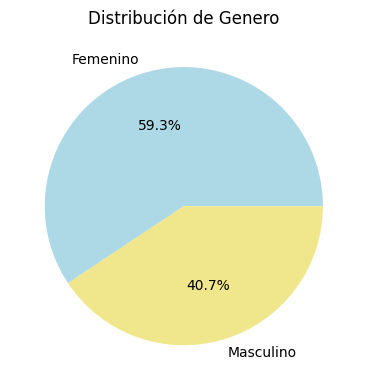

In [81]:
# Dato 1 a usar: Genero

frecuencia= df_principal['GENERO'].value_counts()


tabla = pd.DataFrame({
    'fi': frecuencia,
    'hi': (frecuencia/n) *100, # redondear según contexto y valores de los datos.
    'Fi':frecuencia.cumsum(),
    'Hi':frecuencia.cumsum()/frecuencia.sum()*100
}).round(2)
tabla

import matplotlib.pyplot as plt

valores=tabla['hi'].values  #Separo los valores de la frecuencia relativa
etiquetas=tabla.index #Separo los nombres de las categorías

fig,ax=plt.subplots(figsize=(6,4)) #Declaro el espacio de trabajo

ax.pie(valores,labels=etiquetas,autopct='%.1f%%',colors=['lightblue','khaki','plum','lightgreen','coral',"#E58CC2"])
ax.set_title('Distribución de Genero')

plt.tight_layout()
plt.show()





In [ ]:
import pandas as pd

a=pd.crosstab(df_principal['TIPO DE INSTITUCION'], df_principal['GENERO'])
display(a)





GENERO,Femenino,Masculino
TIPO DE INSTITUCION,,
Centros de Formacion Tecnica,2757,2179
Institutos Profesionales,5881,4506
Universidades CRUCH,6225,4249
Universidades Privadas,5532,3043


# Apartado de calculos estadisticos